# Q learner with fictitious play

In [37]:
import numpy as np

from engine import RMG
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent

In [38]:
batch_size = 1
max_steps = 20
gamma = 0.96

# Reward matrix for the Iterated Prisoner's Dilemma
ipd_rewards = np.array([[-1., 0.], [-3., -2.]])

env = RMG(max_steps=max_steps, payouts=ipd_rewards, batch_size=batch_size)
env.reset()

possible_actions = [0, 1]  # Cooperate or Defect


adversary, dm = RandomAgent(possible_actions, p=0.1), \
    FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.05, epsilon=0.1, gamma=gamma)


# Stateless interactions (agents do not have memory)
s = 0

In [40]:
n_iter = 1000

r0s = []
r1s = []

for i in range(n_iter):

    # A full episode:
    done = False

    while not done:

        # Agents decide
        a0 = dm.act()
        a1 = adversary.act()

        # World changes
        _, (r0, r1), done, _ = env.step(([a0], [a1]))

        # Agents learn
        
        dm.update(s, (a0, a1), (r0, r1), s )
        adversary.update(s, (a1, a0), (r1, r0), s )

        #s = new_s  #stateless!
        
        #print(r0, r1)
        r0s.append(r0[0])
        r1s.append(r1[0])

    env.reset()

In [41]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

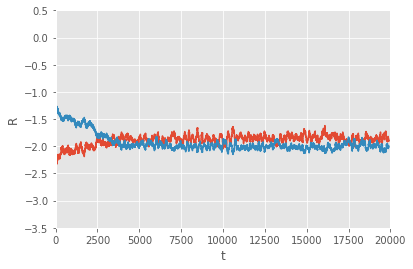

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter, -3.5, 0.5])
plt.plot(moving_average(r0s, 100))
plt.plot(moving_average(r1s, 100))
plt.xlabel('t');
plt.ylabel('R');